Research Question

What is the predicted area burned by forest fires in the Montesinho national park given input variables of the climate?


Research tools

-Microsoft Excel
-Python using Jupyter notebook
-Mozilla Firefox



Expected results/ Hypothesis

The hypothesis or the expected results is a prediction of the final outcome. Its statement goes as follows:
The higher the temperature and the lower the humidity in the given area of the park, the bigger the area burned by forest fire.


Learning goals

In this project the aim is to predict the output value y from input value x
The prediction on the likelihood of forest fires (input y) in the Montesinho national park in Portugal is based on the input x which is the temperature and the humidity. Using a machine learning approach in python, the data is first loaded and then the model is trained to predict to predict the area of a forest fire from the temperature and humidity.  


Data gathering

The forest fire data set was obtained from the machine learning repository (http://archive.ics.uci.edu/ml/datasets/Forest+Fires) and is provided as a CSV file.
It shows amongst others the temperature in Celsius, the relative humidity of the air in percentage the wind speed in km/h, rain in mm/m2 and area burned in acres.



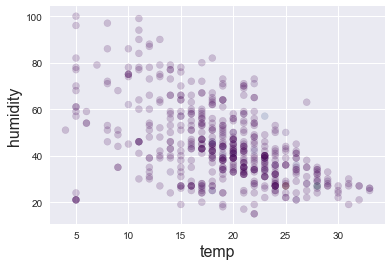

the desity shows the area


In [487]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

data = np.genfromtxt('forestfires_short.csv', delimiter=";", \
                     names=True)

x = data['temp']
y = data['RH']

z = data['area']
prediction = []

#xnorm = np.genfromtxt('forestfires_short_x.csv', delimiter=";")
#ynorm = np.genfromtxt('forestfires_short_y.csv', delimiter=";")

isSizeSame = None

def chk_size(x, y, isSizeSame):
    # Check x and y are equal in size
    if not len(x) == len(y):
        isSizeSame == False
        print('size is not the same')
    else:
        isSizeSame == True
        
chk_size(x, y, isSizeSame)
#if isSizeSame == True:        
#plt.scatter(x,y)
plt.xlabel('Temp in C', fontsize=16)
plt.ylabel('Humidity in %', fontsize=16)


plt.scatter(data['temp'], y, alpha=0.2, c=z, cmap='viridis')
plt.xlabel('temp')
plt.ylabel('humidity');
plt.show()
print('the desity shows the area')

In [468]:
trimX = np.array((data['temp'], data['RH']))
trim = trimX
ii=0
for i in np.ndindex(trimX.shape):
    if np.any(trimX > 75):
        ii += 1
        trim = np.delete(trimX, (ii), axis=0)
    
m = np.array([[0, 64], [0, 79], [0, 165], [0, 50]])
print(m[3, 0])

IndexError: index 2 is out of bounds for axis 0 with size 2

In [409]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3, include_bias=False)
xfit = poly.fit_transform(x[:, None])

In [282]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

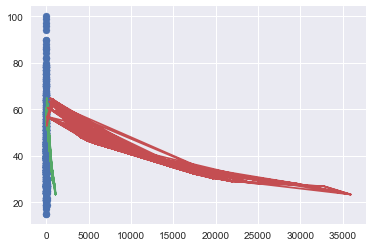

In [286]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(x[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [494]:
from sklearn.linear_model import Ridge


def predictModel(a , b):
    model = LinearRegression(fit_intercept=False)
    X = np.array([data[a]])
    Y = np.array([data[b]])
    model.fit(X, Y)
    #data['area'] = model.predict(Y)
    data['area'] = model.predict(X)
    prediction = model.predict(X)
    print(model.predict(Y))
    

Input = 'temp'
toPredict = 'area'

predicted = predictModel(Input, toPredict)
#predictedModel = model.predict(Y)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00  

d


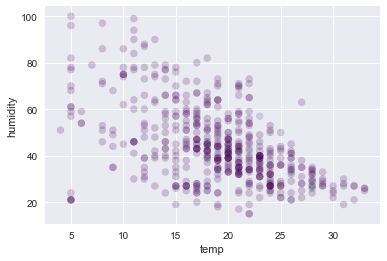

In [471]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
print(np.mean(model.coef_[0]))

print(np.max(model.coef_[0]))

Model slope:     1.52587195801
Model intercept: 0.0
1.52587195801
1.52587195801


[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00  

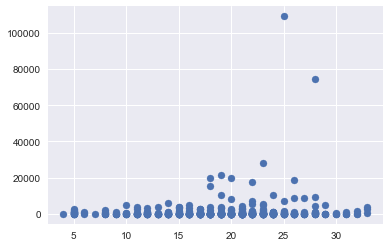

In [499]:
#len(z)
predicted = predictModel(Input, toPredict)
plt.scatter(x, predicted)
